In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D, Flatten

from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [3]:
!kaggle datasets download -d bharath5673/kddcup99data

kddcup99data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
file_name='/content/kddcup99data.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [5]:
data = pd.read_csv('/content/kddcup.data')
data.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
])
data.columns=columns

In [7]:
categ = ['protocol_type','service','flag','attack']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [8]:
indexNames = data[ data['attack'] == 35 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [9]:
X = data.iloc[:,1:41] 
Y = data['attack']

In [10]:
scaler = Normalizer().fit(X) 
X = scaler.transform(X)

In [11]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [12]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [13]:
X_train.shape

(3918744, 40, 1)

In [14]:
Y_train.shape

(3918744,)

In [15]:
cnn = Sequential()
cnn.add(Convolution1D(128, 3 ,activation="relu",input_shape=(40, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(LSTM(70))
cnn.add(Dropout(0.1))
cnn.add(Dense(40, activation="softmax"))

In [16]:
# define optimizer and objective, compile cnn

cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [17]:
# train
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

In [18]:
history=cnn.fit(X_train, Y_train, epochs=10,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])

Epoch 1/10
7838/7838 [==============================] - 139s 16ms/step - loss: 0.1949 - accuracy: 0.9397 - val_loss: 0.0238 - val_accuracy: 0.9954
Epoch 2/10
7838/7838 [==============================] - 126s 16ms/step - loss: 0.0181 - accuracy: 0.9959 - val_loss: 0.0088 - val_accuracy: 0.9978
Epoch 3/10
7838/7838 [==============================] - 136s 17ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.0074 - val_accuracy: 0.9981
Epoch 4/10
7838/7838 [==============================] - 135s 17ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 5/10
7838/7838 [==============================] - 135s 17ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 6/10
7838/7838 [==============================] - 126s 16ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 7/10
7838/7838 [==============================] - 135s 17ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0

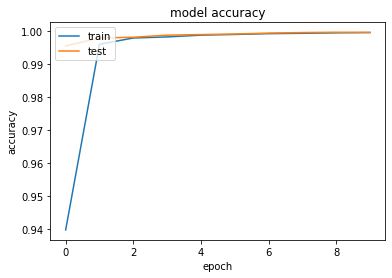

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

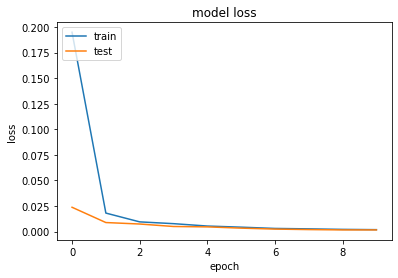

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [21]:
cnn.save("results/cnn1results/cnn_model.hdf5")